In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from czifile import CziFile
from os.path import join
import ipywidgets as widgets


path = "/home/phuijse/Work/Data/Araya/"

with CziFile(join(path, "test2.czi")) as czi:
    image_arrays = czi.asarray()
    meta = czi.metadata(raw=False)
    
#display(meta)

Scikit image

- https://scikit-image.org/docs/stable/auto_examples/filters/plot_nonlocal_means.html?highlight=denoise
- https://scikit-image.org/docs/dev/auto_examples/filters/plot_hysteresis.html
- http://emmanuelle.github.io/a-tutorial-on-segmentation.html

<IPython.core.display.Javascript object>


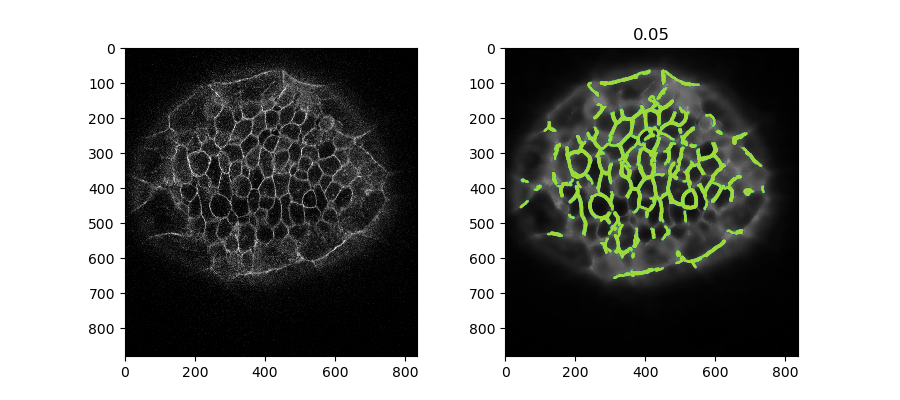

interactive(children=(IntSlider(value=0, description='k', max=59), IntSlider(value=0, description='z', max=16)…

In [3]:
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import restoration
from skimage import img_as_float
from skimage import feature


k = 1
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

def update(k, z, h, low, high):
    img = image_arrays[0, 0, 0, k, z, :, :, 0]
    for ax_ in ax:
        ax_.cla()
    ax[0].imshow(img, cmap=plt.cm.Greys_r)
    im_float = img_as_float(img)
    im_denoised = restoration.denoise_nl_means(im_float, h=h)
    #distance = ndi.distance_transform_edt(img)
    #local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=img)
    #markers = ndi.label(local_maxi)[0]
    #abels = watershed(-distance, markers, mask=img)
    #ax[1].imshow(labels)
    ax[1].imshow(im_denoised, cmap=plt.cm.Greys_r)   
    
    edges = feature.canny(im_denoised, sigma=0.0, low_threshold=low, high_threshold=high)
    
    ax[1].contour(edges)
    ax[1].set_title(h)
    
widgets.interact(update, k=widgets.IntSlider(min=0, max=59),
                 z=widgets.IntSlider(min=0, max=16),
                 h=widgets.FloatSlider(min=0., max=1., value=0.05, step=0.01),
                 low=widgets.FloatSlider(min=0., max=1., value=0.05, step=0.01),
                 high=widgets.FloatSlider(min=0., max=1., value=0.1, step=0.01));

OpenCV and Mahotas


- https://github.com/luispedro/python-image-tutorial/blob/master/Segmenting%20cell%20images%20(fluorescent%20microscopy).ipynb

In [53]:
maxima

array([[  0,   0,   0, ...,   0,   0, 125],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int32)

<IPython.core.display.Javascript object>


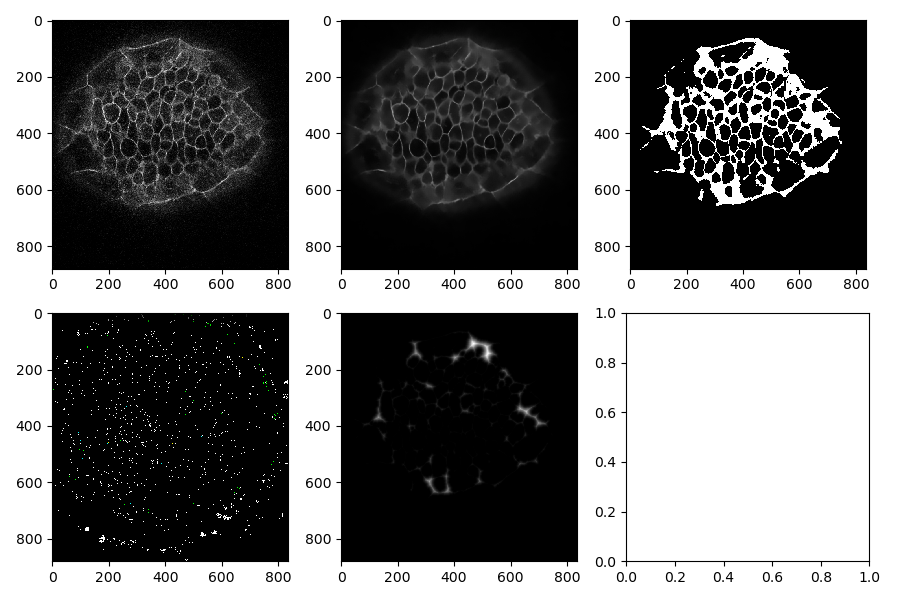

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [72]:
import cv2
import mahotas as mh

fig, ax = plt.subplots(2, 3, figsize=(9, 6), tight_layout=True)

img = image_arrays[0, 0, 0, 0, 0, :, :, 0]
img = ((img/img.max())*255).astype('uint8')
# original
ax[0, 0].imshow(img, cmap=plt.cm.Greys_r)
# denoising
img_cv = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
dst = cv2.fastNlMeansDenoisingColored(img_cv, None, 30, 30, 7, 21)
ax[0, 1].imshow(dst)
# Thresholding
binary_mask = dst[:, :, 0] > 40
ax[0, 2].imshow(binary_mask, cmap=plt.cm.Greys_r)
# watershed

#ax[1, 1].imshow(dist)
maxima = mh.regmax(mh.stretch(dst))
maxima,_= mh.label(maxima)
ax[1, 0].imshow(maxima)
#ax[1, 0].imshow(mh.as_rgb(np.maximum(255*maxima, img), img, binary_mask))
    
dist = mh.distance(binary_mask)
#dist = 255 - mh.stretch(dist)
ax[1, 1].imshow(dist, cmap=plt.cm.Greys_r)
#watershed = mh.cwatershed(dist, maxima)
#ax[1, 2].imshow(watershed, cmap=plt.cm.Greys_r)
#watershed = mh.labeled.remove_bordering(watershed)
#ax[1, 1].imshow(watershed*binary_mask, cmap=plt.cm.Greys_r)
#ax[1].imshow(im_denoised, cmap=plt.cm.Greys_r)   
